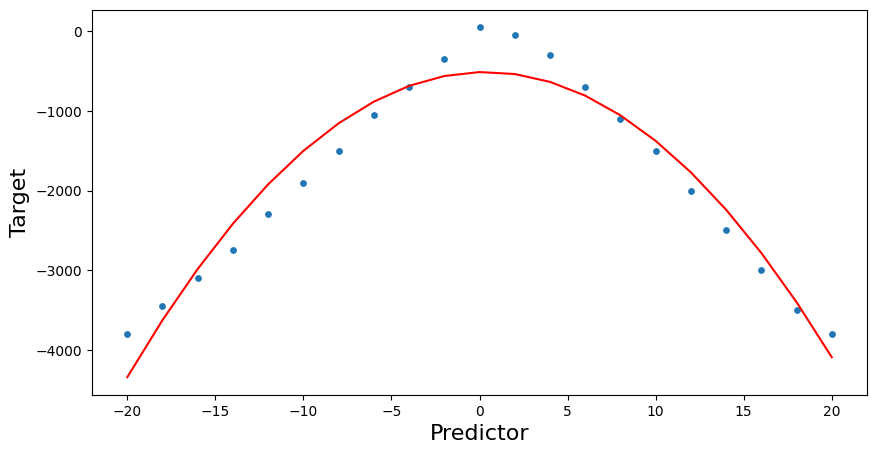

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

data = pd.read_csv('quadratic_data.csv')
X = data['Predictor'].values.reshape(-1, 1)
y = data['Target'].values

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

plt.figure(figsize=(10, 5))
plt.scatter(X, y, s=15)
plt.plot(X, y_pred, color='r')
plt.xlabel('Predictor', fontsize=16)
plt.ylabel('Target', fontsize=16)
plt.show()

RMSE for Linear Regression => 1247.7965117828962


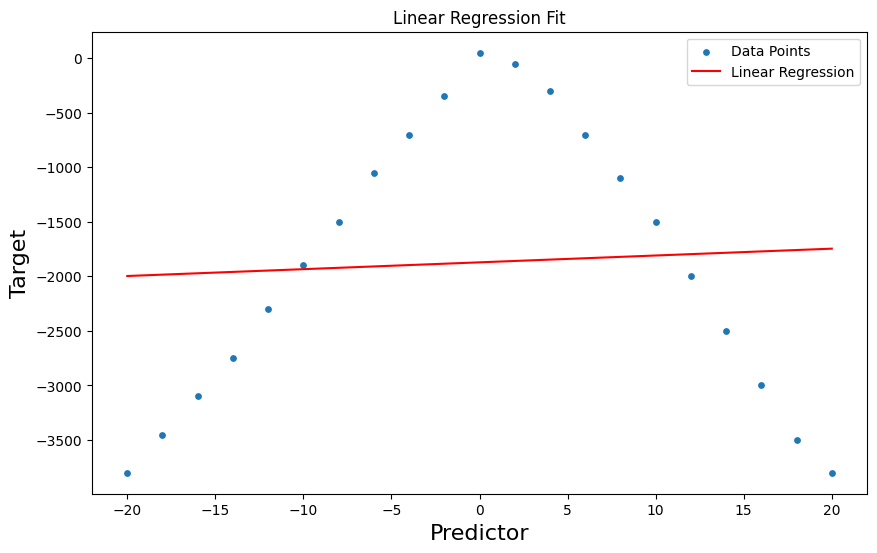

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = pd.read_csv('quadratic_data.csv')
X = data['Predictor'].values.reshape(-1, 1)
y = data['Target'].values

linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)

rmse_linear = np.sqrt(mean_squared_error(y, y_pred_linear))
print('RMSE for Linear Regression =>', rmse_linear)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=15, label='Data Points')
plt.plot(X, y_pred_linear, color='r', label='Linear Regression')
plt.xlabel('Predictor', fontsize=16)
plt.ylabel('Target', fontsize=16)
plt.legend()
plt.title('Linear Regression Fit')
plt.show()

RMSE for Polynomial Regression => 300.9573161373565


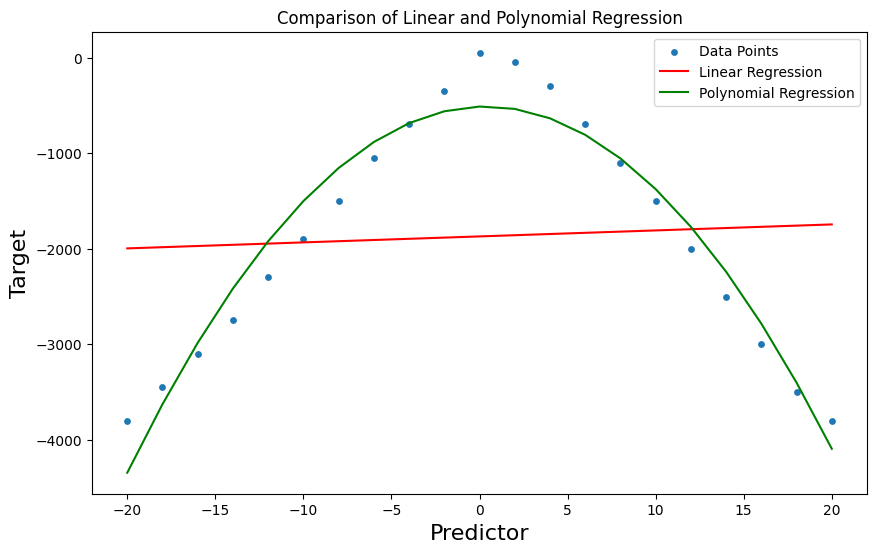

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

data = pd.read_csv('quadratic_data.csv')
X = data['Predictor'].values.reshape(-1, 1)
y = data['Target'].values

linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)

degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X, y)
poly_pred = poly_model.predict(X)

rmse_linear = np.sqrt(mean_squared_error(y, y_pred_linear))
rmse_poly = np.sqrt(mean_squared_error(y, poly_pred))

print('RMSE for Polynomial Regression =>', rmse_poly)

sorted_zip = sorted(zip(X.flatten(), poly_pred))
x_poly, poly_pred_sorted = zip(*sorted_zip)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=15, label='Data Points')
plt.plot(X, y_pred_linear, color='r', label='Linear Regression')
plt.plot(x_poly, poly_pred_sorted, color='g', label='Polynomial Regression')
plt.xlabel('Predictor', fontsize=16)
plt.ylabel('Target', fontsize=16)
plt.legend()
plt.title('Comparison of Linear and Polynomial Regression')
plt.show()